In [109]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import time
import math
from collections import namedtuple

# Метод средней точки

In [110]:
lines = [
    [70, 90, 500, 300],
    [210, 150, 100, 400],
    [50, 500, 400, 240],
    [100, 340, 430, 210],
    [100, 50, 500, 500],
]

clip_rect = [100, 50, 400, 700] # x_min, y_min, x_max, y_max

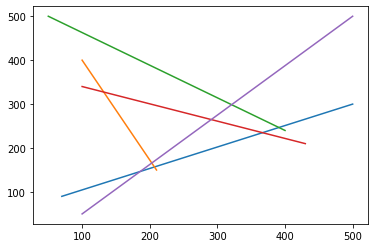

In [111]:
for i in range(len(lines)):
    plt.plot(lines[i][::2], lines[i][1::2])
plt.show()

In [112]:
def in_rec_point(x, y):
    return x > clip_rect[0] and y > clip_rect[1] and \
           x < clip_rect[2] and y < clip_rect[3]

def clip(x1, y1, x2, y2, clipped):
    if math.dist([x1, y1], [x2, y2]) < 1:
        return
    
    if in_rec_point(x1, y1) and in_rec_point(x2, y2):
        clipped.append([x1, y1])
        clipped.append([x2, y2])
    
    clip(x1, y1, (x1 + x2) / 2, (y1 + y2) / 2, clipped)
    clip((x1 + x2) / 2, (y1 + y2) / 2, x2, y2, clipped)

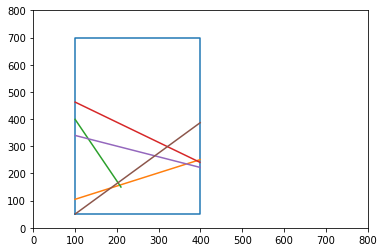

In [113]:
x = [clip_rect[0], clip_rect[2], clip_rect[2], clip_rect[0], clip_rect[0]]
y = [clip_rect[1], clip_rect[1], clip_rect[3], clip_rect[3], clip_rect[1]]
plt.plot(x, y)

plt.xlim([0, 800])
plt.ylim([0, 800])

for i in range(len(lines)):
    clipped = []
    clip(lines[i][0], lines[i][1], lines[i][2], lines[i][3], clipped)
    clipped.sort(key=lambda x: x[0])
    plt.plot([clipped[0][0], clipped[-1][0]], [clipped[0][1], clipped[-1][1]])
plt.show()